In [1]:
import scipy.integrate
import numpy as np
import sympy
import matplotlib.pyplot as plt


In [87]:
#定義函數&變數
t=sympy.symbols('t')
x=sympy.Function('x')

#寫出ODE
ode=x(t).diff(t)+x(t)+1
sympy.Eq(ode)

Eq(x(t) + Derivative(x(t), t) + 1, 0)

In [88]:
#解ODE
S_g=sympy.dsolve(ode)
S_g

Eq(x(t), C1*exp(-t) - 1)

In [89]:
#帶入初始值找特解
#初始值設成字典
ini={x(0):10}

#rhs表示eq右邊,subs表示把符號t換成其他東西
S_p=sympy.Eq(S_g.lhs.subs(t,0).subs(ini),S_g.rhs.subs(t,0))
S_p

Eq(10, C1 - 1)

In [96]:
#實際解出未知常數,記得加上"[]"，這樣吐出來的ini_con才是dictionary,帶回去才方便
a=sympy.solve([S_p])
a

{C1: 11}

In [98]:
#帶回原本的解
S_k=S_g.subs(a)
S_k

Eq(x(t), -1 + 11*exp(-t))

In [17]:
#解一階線性ode v'=Av
def f(v,t):
    x,y=v
    return [np.cos(t),-x]
#這裡A=diag(2,1)

In [20]:
#解ode  (-1,1)為初始條件  t是f的變數 這裡f不dep on t
t=np.linspace(0,10,101)
sol=scipy.integrate.odeint(f,(0,1),t)

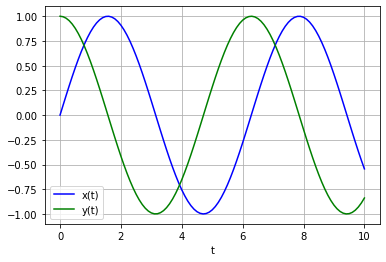

In [21]:
plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [101]:
def A(X,t,a,b):
    x,y=X
    return (y,(-a-b*np.cos(t))*x)  
def fund_matrix(X_1,X_2):
    return np.stack((X_1[1,],X_2[1,]))

In [102]:
def phi(a,b):
    t=np.array([0,2*np.pi])
    X_1=scipy.integrate.odeint(A,(1,0),t,args=(a,b))
    X_2=scipy.integrate.odeint(A,(0,1),t,args=(a,b))
    M=fund_matrix(X_1,X_2)
    return np.trace(M)

In [241]:
a=np.arange(0,20,0.01)
Phi1=np.empty(0)
for s in a:
    Phi1=np.append(Phi1,phi(s,0))
    

KeyboardInterrupt: 

No handles with labels found to put in legend.


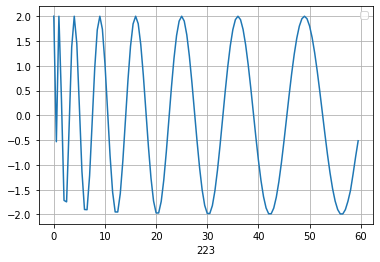

In [106]:
plt.plot(a, Phi1)
plt.legend(loc='best')
plt.xlabel('223')
plt.grid()
plt.show()

In [123]:
T=np.empty(0)
for s in a:
    if abs(abs(phi(s,0))-2)<10**(-5):
        T=np.append(T,s)
#value of a such that phi(a,0)=2 i.e vertex of tongue
T

In [242]:
a=np.arange(0,20,0.01)
b=a
Tongue_a=[]
Tongue_b=[]
for s in a:
    for l in b:
        if abs(abs(phi(s,l))-2)<10**(-5):
            Tongue_a.append(s)
            Tongue_b.append(l)

KeyboardInterrupt: 

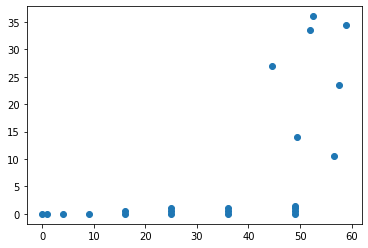

In [239]:
plt.scatter(Tongue_a,Tongue_b)

In [240]:
len(Tongue_a)

23